<a href="https://colab.research.google.com/github/Sitesh14/Group_E_Case_Study_4/blob/main/CaseStudy_4_Group_E_Sitesh_S_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok E:**
1. Chika Ramadhani (1906374004)
2. Muhamad Ido Raskapati (1906354154)
3. Muhammad Fabian Alkautsar (2006482653)
4. Muhammad Rangga Buwana (1906376640)
5. Sanjung Maharani (1906354210)
6. Sitesh Suresh Bhojwani (1906354085)
7. Zalfa Nurfadhilah Haris (1906305291)




# **Problem Statment**

**Ashrae - Great Energy Predictor**:



*   Ashrae adalah suatu organisasi di bidang lingkungan yang bertujuan untuk menciptakan lingkungan yang sehat dan berkelanjutan.
*   Anda adalah seorang data analyst yang bekerja untuk melihat seberapa besar energi listrik yang digunakan oleh suatu gedung pencakar langit di musim panas untuk dapat melakukan efisiensi dalam penggunaan energi listrik.
*   Anda ditugaskan untuk membentuk model regresi dan menganalisis korelasi antara varibael independen dan meter_reading untuk memberikan rekomendasi yang dapat dilakukan untuk mengurangi penggunaan listrik yang sejalan dengan misi organisasi Ashrae.





## **Main Focus**



*   Bagaimana hasil korelasi berdasarkan heatmap?
*   Bagaimana model terbaik dari hasil regresi?
*   Langkah apa yang dapat dilakukan untuk mengurangi penggunaan energi listrik pada gedung tersebut?
*   Berdasarkan model regresi yang dibangun, apa saja variabel yang signifikan mempengaruhi meter_reading?






# **Modules**

In [ ]:
#Import Modules
import warnings; warnings.simplefilter('ignore')
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np
plt.style.use('bmh'); sns.set()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf

# **Data Set**

In [ ]:
import pandas as pd

file_ = 'data/Ashrae_Energy_Mean.csv'
try: #Loading Locally
    df = pd.read_csv(file_)
except Exception as err_:
    print(err_, " Trying to load data from GitHub.")
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataid/eLearning/master/data/Ashrae_Energy_Mean.csv
    df = pd.read_csv(file_)

print(df.shape)
df.head(10)

(1413, 12)


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
5,28.963481,Education,8000,2000.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
6,104.080095,Lodging/residential,27926,1981.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
7,569.244417,Education,121074,1989.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
8,417.394827,Education,60809,2003.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
9,118.129516,Office,27000,2010.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
# Data Size
N, P = df.shape
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)

# Variable Type
print("Tipe Variabel df = ", type(df))

# Show The First Five Data
df.head()

baris =  1413 , Kolom (jumlah variabel) =  12
Tipe Variabel df =  <class 'pandas.core.frame.DataFrame'>


,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,237.749127,Education,7432,2008.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
1,118.553743,Education,2720,2004.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
2,23.626500,Education,5376,1991.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
3,382.736016,Education,23685,2002.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472
4,1579.174237,Education,116607,1975.0,NaN,22.744816,2.998727,17.379328,1.240589,1017.949437,152.521015,3.391472


In [ ]:
# Show The Last Five Data
df.tail()

,meter_reading,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
1408,7.484137,Entertainment/public assembly,19619,1914.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1409,4.732815,Education,4298,NaN,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1410,7.211347,Entertainment/public assembly,11265,1997.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1411,187.117994,Lodging/residential,29775,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547
1412,3.338595,Office,92271,2001.0,NaN,9.079138,1.092101,4.512823,3.381837,1017.192111,186.648787,3.619547


In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413 entries, 0 to 1412
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   meter_reading       1413 non-null   float64
 1   primary_use         1413 non-null   object 
 2   square_feet         1413 non-null   int64  
 3   year_built          663 non-null    float64
 4   floor_count         352 non-null    float64
 5   air_temperature     1413 non-null   float64
 6   cloud_coverage      1396 non-null   float64
 7   dew_temperature     1413 non-null   float64
 8   precip_depth_1_hr   1237 non-null   float64
 9   sea_level_pressure  1324 non-null   float64
 10  wind_direction      1413 non-null   float64
 11  wind_speed          1413 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 132.6+ KB


Note:

Berdasarkan hasil pengecekan data dari Phyton, tipe data tiap variabel sudah sesuai dengan yang diperlukan untuk komputasi, yakni:


1.   
Kolom ‘meter_reading’ dengan tipe data float, contoh : 1513,590917; 970,7127088; dan 2048,097374.
2.   Kolom ‘primary_use’ dengan tipe data object, contoh: Office, Education, dan Parking.
3. Kolom ‘square_feet’ dengan tipe data integer, contoh: 283, 2000, dan 450000.
4. Kolom ‘year_built’ dengan tipe data float, contoh: 1991, 2004, dan 2008
5. Kolom ‘floor_count’ dengan tipe data float, contoh: 4, 7, dan 13.
6. Kolom ‘air_temperature’ dengan tipe data float, contoh: 9,1156279706453; 22,744815786472, dan 24,963702380047
7. Kolom ‘cloud_coverage’ dengan tipe data float, contoh: 2,9987275; 0,0592662; dan 2,0837116
8. Kolom ‘dew_temperature’ dengan tipe data float, contoh: 17,379328;  7,5781074; dan 3,9018137
9. Kolom ‘precip_depth_1_hr’ dengan tipe data float, contoh: 1,240589; 0,155325; dan 0,89598
10. Kolom ‘sea_level_pressure’ dengan tipe data float, contoh: 1017,9494;  1015,7571;  dan 1011,4366
11. Kolom ‘wind_direction’ dengan tipe data float, contoh: 129,10686864495; 152,52101497439; dan 207,13407606608.
12. Kolom ‘wind_speed’ dengan tipe data float, contoh: 2,8997945908935; 3,9054327563249; dan 4,846471991382.



# **Pre Processing**

In [ ]:
#Drop Kolom Year Built dan Floor Count
df2=df.drop(["year_built","floor_count"], axis=1)

In [ ]:
#Drop baris yang memiliki minimal 1 missing value pada data
df2=df2.dropna()

In [ ]:
#Checking persentase missing value yang ada pada data
df.isnull().sum()/len(df)*100

meter_reading          0.000000
primary_use            0.000000
square_feet            0.000000
year_built            53.078556
floor_count           75.088464
air_temperature        0.000000
cloud_coverage         1.203114
dew_temperature        0.000000
precip_depth_1_hr     12.455768
sea_level_pressure     6.298655
wind_direction         0.000000
wind_speed             0.000000
dtype: float64

In [ ]:
#Checking duplicate
print(df2.shape)
df2.duplicated().sum()
#Karena tidak ada data yang duplikat, tidak ada proses penghapusan data duplikat

(1220, 10)


0

In [ ]:
df2.describe(include='all')

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1220.000000,1220,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000,1220.000000
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,177.946855,NaN,94248.848361,16.471980,2.281007,8.414446,1.041719,1016.581075,170.755007,3.397821
std,287.765589,NaN,112289.202199,5.417993,1.285398,4.911634,0.813402,1.946086,23.708903,0.603191
min,0.184487,NaN,283.000000,9.079138,0.338958,-0.304675,0.155325,1011.436563,123.388701,2.157103
25%,29.748446,NaN,23097.750000,13.109654,1.092101,3.901814,0.775686,1016.426988,152.521015,3.100911
50%,81.174928,NaN,59363.000000,15.502518,2.083712,8.285693,0.895980,1016.797495,184.295922,3.619547
75%,187.132348,NaN,116858.500000,22.744816,2.998727,9.834399,1.033215,1017.949437,186.648787,3.905433


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df2[['meter_reading', 'square_feet', 'air_temperature','cloud_coverage', 'dew_temperature', 'precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']] = scaler.fit_transform(df2[['meter_reading', 'square_feet', 'air_temperature','cloud_coverage', 'dew_temperature', 'precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed']])
df2.head()
# Continue to Modelling

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0.207901,Education,-0.773471,1.158253,0.558593,1.825983,0.244592,0.703424,-0.769393,-0.01053
1,-0.206479,Education,-0.815451,1.158253,0.558593,1.825983,0.244592,0.703424,-0.769393,-0.01053
2,-0.536491,Education,-0.791788,1.158253,0.558593,1.825983,0.244592,0.703424,-0.769393,-0.01053
3,0.711945,Education,-0.628669,1.158253,0.558593,1.825983,0.244592,0.703424,-0.769393,-0.01053
4,4.871333,Education,0.199194,1.158253,0.558593,1.825983,0.244592,0.703424,-0.769393,-0.01053


### Detection and Handling Missing Value, Duplicated Data and Scalling:

1. Pada variabel ‘year_built’ terdapat missing value lebih dari 53% sehingga kolom year_built akan dihapus
2. Pada variabel ‘floor_count’ terdapat missing value lebih dari 75% sehingga kolom floor_count akan dihapus.
3. Pada variabel ‘cloud_coverage’ ditemukan missing value sebanyak 17 data atau sebesar 1.2% sehingga observasi pada baris tersebut dihapus karena tidak mempengaruhi interpretasi
4. Pada variabel ‘precip_depth’ ditemukan missing value sebanyak 176 data atau sebesar 12.4%, sehingga observasi pada baris tersebut dihapus karena tidak mempengaruhi interpretasi
5. Pada variabel ‘sea_level_pressure’ ditemukan missing value sebanyak 89 data atau sebesar 6.2% sehingga observasi pada baris tersebut dihapus karena tidak mempengaruhi interpretasi
6. Tidak terdapat duplicated data.
7. Pada langkah preprocessing terakhir, dilakukan scaling pada data numerical agar dataset memiliki rentang nilai (scale) yang sama. 




# **Exploratory Data Analysis**

Text(0.5, 1.05, 'Primary use')

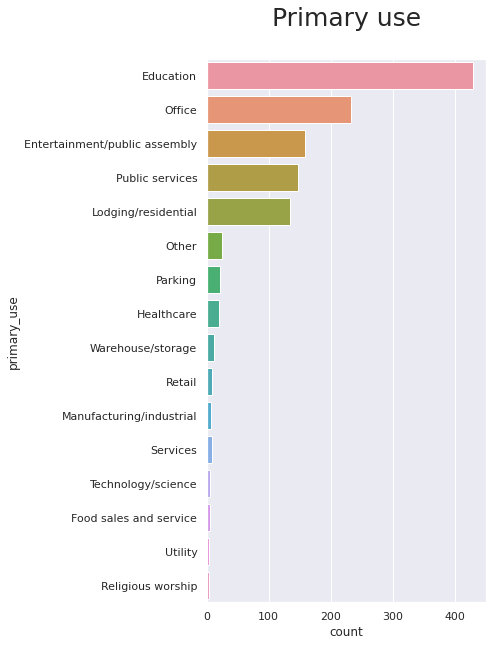

In [ ]:
fig, ax = plt.subplots(figsize=(5,10))

sns.countplot(data=df2, y='primary_use',order=df['primary_use'].value_counts().index)
#title

ax.set_title('Primary use', fontsize=25, y=1.05)

###Intepretasi :
Terlihat bahwa penggunaan gedung terbanyak adalah untuk Education, Office, Entertainment/Public Assembly, Public Services, dan Lodging/Residential. Sedangkan penggunaan gedung yang paling sedikit adalah untuk Religious Worship.


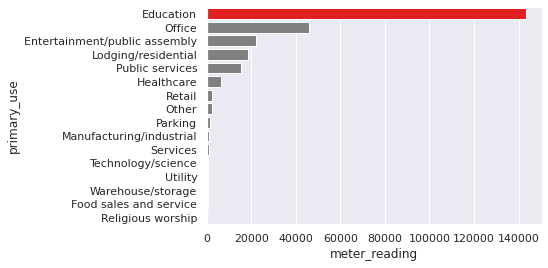

In [ ]:
data = df.groupby('primary_use').aggregate({'meter_reading':np.sum})
data.reset_index(inplace = True)
data.sort_values('meter_reading',inplace=True)
color = ['grey' if (x>min(data['meter_reading']))else 'red' for x in data['meter_reading']]
sns.barplot(x='meter_reading', y = 'primary_use', data = data, palette=color, order=data.sort_values('meter_reading', ascending=False).primary_use)

###Interpretasi:
Terlihat bahwa penggunaan energi listrik pada gedung terbanyak adalah untuk Education, Office, Entertainment/Public Assembly, Public Services, dan Lodging/Residential. Sedangkan penggunaan energi listrik pada gedung paling sedikit adalah untuk Religious Worship.

## **Regresi dan Korelasi**

In [ ]:
df2.describe(include='all')

,meter_reading,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,1.220000e+03,1220,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03,1.220000e+03
unique,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,-7.571357e-17,NaN,-2.912060e-17,2.562613e-16,-2.795578e-16,2.562613e-16,9.318593e-17,5.186962e-14,2.096683e-16,7.687839e-16
std,1.000410e+00,NaN,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00,1.000410e+00
min,-6.179866e-01,NaN,-8.371632e-01,-1.365058e+00,-1.511475e+00,-1.775926e+00,-1.090184e+00,-2.644601e+00,-1.998647e+00,-2.057767e+00
25%,-5.152082e-01,NaN,-6.339013e-01,-6.208397e-01,-9.253122e-01,-9.191408e-01,-3.271959e-01,-7.921015e-02,-7.693932e-01,-4.924348e-01
50%,-3.364253e-01,NaN,-3.108060e-01,-1.790072e-01,-1.535529e-01,-2.622463e-02,-1.792462e-01,1.112535e-01,5.713663e-01,3.677389e-01
75%,3.193314e-02,NaN,2.014345e-01,1.158253e+00,5.585933e-01,2.892186e-01,-1.045934e-02,7.034237e-01,6.706467e-01,8.418886e-01


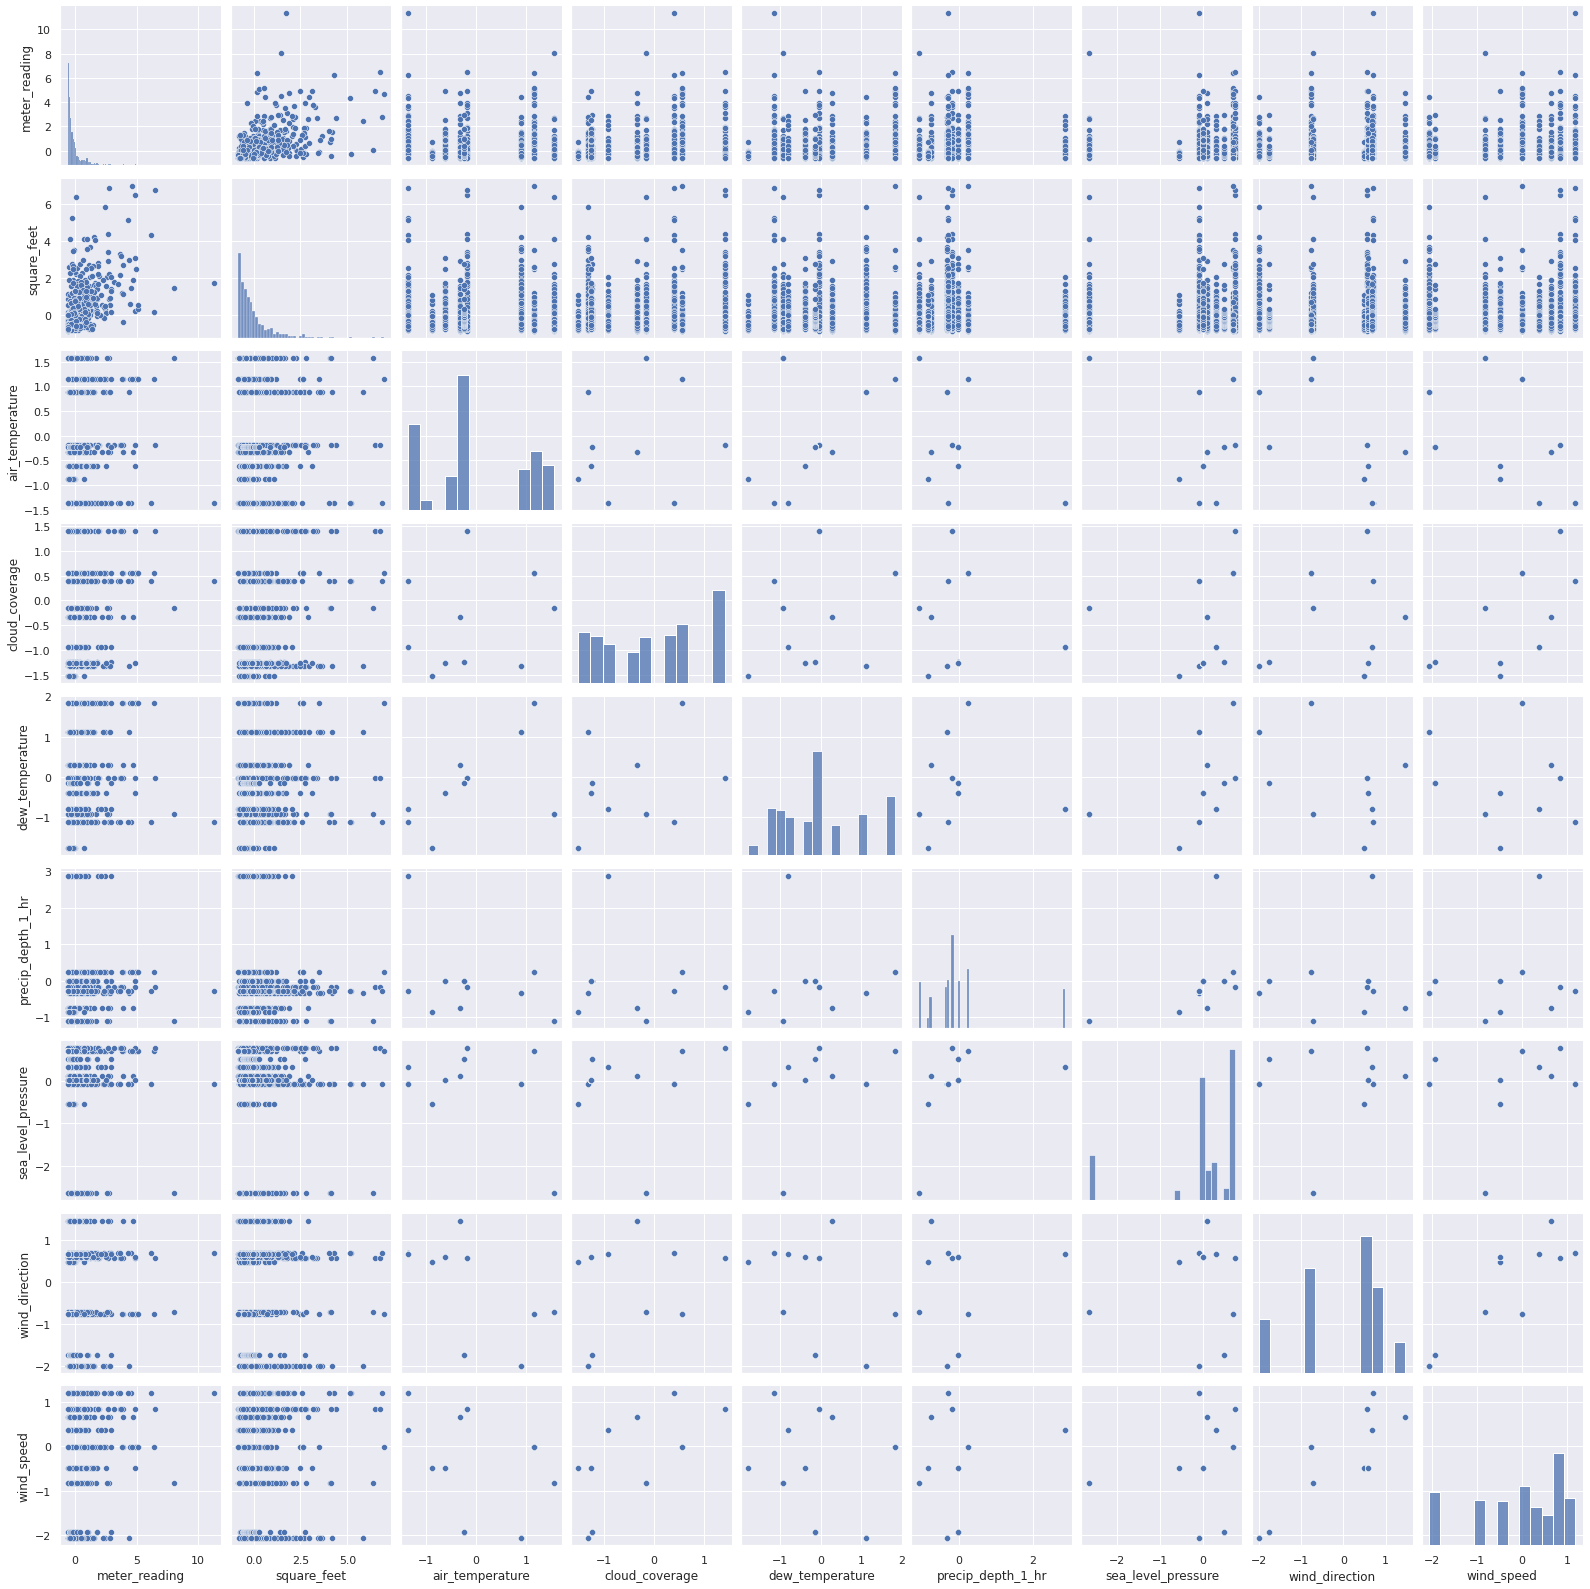

In [ ]:
p = sns.pairplot(df2)

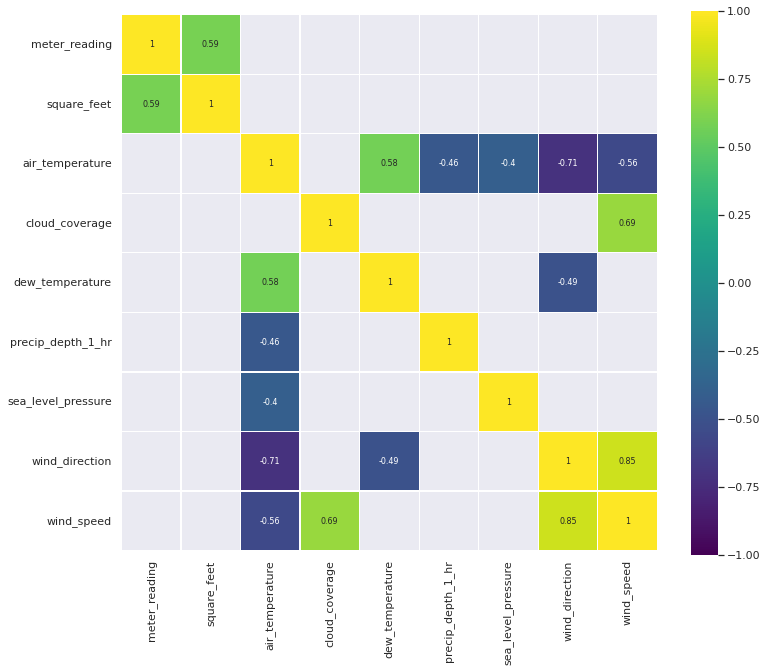

In [ ]:
# HeatMap untuk menyelidiki korelasi
corr2 = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)],
 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
 annot=True, annot_kws={"size": 8}, square=True);

In [ ]:
#Menentukan Model Regresi 
res = ols(formula='(meter_reading) ~  C(primary_use) + air_temperature + cloud_coverage + dew_temperature	+ precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed ', data=df2).fit()
print(res.params)
print(res.summary())

Intercept                                          0.257693
C(primary_use)[T.Entertainment/public assembly]   -0.399163
C(primary_use)[T.Food sales and service]          -0.447414
C(primary_use)[T.Healthcare]                       0.369014
C(primary_use)[T.Lodging/residential]             -0.428110
C(primary_use)[T.Manufacturing/industrial]        -0.716008
C(primary_use)[T.Office]                          -0.282064
C(primary_use)[T.Other]                           -0.721580
C(primary_use)[T.Parking]                         -0.792096
C(primary_use)[T.Public services]                 -0.489775
C(primary_use)[T.Religious worship]               -0.734555
C(primary_use)[T.Retail]                          -0.118270
C(primary_use)[T.Services]                        -0.717022
C(primary_use)[T.Technology/science]              -0.453055
C(primary_use)[T.Utility]                         -0.223306
C(primary_use)[T.Warehouse/storage]               -0.738215
air_temperature                         

In [ ]:
#Menentukan Mode Regresi dengan Transformasi ln(y)
res = ols(formula='np.log(meter_reading) ~  C(primary_use) + air_temperature + cloud_coverage + dew_temperature	+ precip_depth_1_hr + sea_level_pressure + wind_direction + wind_speed ', data=df2).fit()
print(res.params)
print(res.summary())

Intercept                                         -4.087285e-01
C(primary_use)[T.Entertainment/public assembly]   -3.484209e-02
C(primary_use)[T.Food sales and service]          -2.622428e+00
C(primary_use)[T.Healthcare]                      -4.753297e-01
C(primary_use)[T.Lodging/residential]             -1.070330e+00
C(primary_use)[T.Manufacturing/industrial]        -1.385172e+00
C(primary_use)[T.Office]                          -4.711291e-01
C(primary_use)[T.Other]                            5.656416e-01
C(primary_use)[T.Parking]                         -8.982897e-16
C(primary_use)[T.Public services]                 -8.163186e-01
C(primary_use)[T.Religious worship]                6.579497e-17
C(primary_use)[T.Retail]                           6.564448e-01
C(primary_use)[T.Services]                        -1.483239e+00
C(primary_use)[T.Technology/science]              -2.455577e+00
C(primary_use)[T.Utility]                          1.030235e+00
C(primary_use)[T.Warehouse/storage]     

In [ ]:
#Forward Selection untuk pemilihan model

In [ ]:
import statsmodels.formula.api as smf


def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [ ]:
model = forward_selected(df2, 'meter_reading')

print(model.model.formula)
print(model.rsquared_adj)

meter_reading ~ square_feet + primary_use + dew_temperature + wind_speed + wind_direction + cloud_coverage + air_temperature + sea_level_pressure + precip_depth_1_hr + 1
0.43837425640650407


In [ ]:
# Interpretasi koefisien
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          meter_reading   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     42.37
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          5.05e-137
Time:                        08:51:16   Log-Likelihood:                -1367.6
No. Observations:                1220   AIC:                             2783.
Df Residuals:                    1196   BIC:                             2906.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

**Korelasi Berdasarkan Heatmap:**
1. Terdapat korelasi linear positif sebesar 0,59 antara meter_reading dan square_feet. Ada kecenderungan bahwa meter_reading yang tinggi cukup berkaitan dengan square_feet yang tinggi.
2. Terdapat korelasi linear positif sebesar 0,58 antara dew_temperature dan air_temperature. Ada kecenderungan bahwa dew_temperature yang tinggi cukup berkaitan dengan air_temperature yang tinggi.
3. Terdapat korelasi linear positif sebesar 0,69 antara cloud_coverage dan wind_speed. Ada kecenderungan bahwa cloud_coverage tinggi cukup berkaitan dengan wind_speed yang lebih tinggi.
4. Terdapat korelasi linear positif sebesar 0,85 antara wind_speed dan wind_direction. Ada kecenderungan bahwa wind_speed tinggi berkaitan dengan wind_direction yang lebih tinggi.
5. Terdapat korelasi linear negatif sebesar -0,71 antara wind_direction dan air_temperature. Ada kecenderungan bahwa arah pergerakan nilai kedua variabel saling berlawanan. 
6. Terdapat korelasi linear negatif sebesar -0,56 antara wind_speed dan air_temperature. Ada kecenderungan bahwa arah pergerakan nilai kedua variabel saling berlawanan. 
7. Terdapat korelasi linear negatif sebesar -0,49 antara wind_direction dan dew_temperature. Ada kecenderungan bahwa arah pergerakan nilai kedua variabel saling berlawanan. 
8. Terdapat korelasi linear negatif sebesar -0,46 antara precip_depth dan air_temperature. Ada kecenderungan bahwa arah pergerakan nilai kedua variabel saling berlawanan. 
9. Terdapat korelasi linear negatif sebesar -0,4 antara sea_level dan air_temperature. Ada kecenderungan bahwa arah pergerakan nilai kedua variabel saling berlawanan. 
10. Untuk hubungan antara 2 variabel lain yang tidak disebutkan di atas, misalnya hubungan antara meter_reading dengan air_temperature, memiliki koefisien korelasi sebesar 0. Artinya tidak terdapat hubungan yang linier antara dua variabel, tetapi mungkin memiliki hubungan dalam bentuk lain; misal: kuadratik, atau fungsi lain selain linier 



**Regresi**

Untuk menentukan model terbaik, salah satunya ialah dengan melihat dari nilai adjusted r square. Model pertama adalah model Ordinary Least Square (OLS) tanpa transformasi dan didapat nilai adjusted R squared sebesar 6%. Sedangkan model kedua adalah model Ordinary Least Square (OLS) dengan transformasi ln(y) pada meter_reading (variabel terikat) maka didapat nilai R squared sebesar 5,9%. Sehingga terlihat bahwa transformasi pada meter_reading tidak berhasil. 
Selanjutnya dilakukan forward selection untuk menentukan model terbaik. Dari hasil forward selection diperoleh model yang menghasilkan nilai adjustednya R squared nya 43%. Nilai ini jauh lebih besar dibandingkan dengan percobaan-percobaan model sebelumnya. Oleh karena itu, model yang akan dipilih adalah model dengan teknik forward selection. 

Selain nilai R^2 adjusted, dari nilai Prob (F-Statisti) < 0.05 yang menunjukkan bahwa model yang telah dibangun berguna atau minimal salah satu koefisien pada model yang dibangun signifikan.

Kemudian, berdasarkan nilai-nilai dari P>|t| yang menunjukkan nilai p-vallue dari statistik uji-t pada masing-masing variabel yang dibangun pada model, didapatkan variabel-variabe Primary_use dengan kategori Entertaiment/public assembly, Lodging/residential, office, Other, Parking, Public Service, Services dan seluruh variabel numerik independent. 





Nilai durbin watson yang nilainya 1.875 yang nilainya berada pada interval [1.5,2,5] meunjukkan tidak adanya auto korelasi pada data yang kita miliki. 

# **Kesimpulan dan Saran**



*   Berdasarkan hasil heatmap, dimana korelasi antara wind_direction dan air_temperature cukup besar, maka akan disarankan pada penelitian selanjutnya agar hanya menguji salah satu variabel saja untuk mengurangi biaya penelitian mengingat alat yang digunakan berbeda untuk mengukur kedua hal tersebut.
*   Berdasarkan hasil heatmap, dimana korelasi antara wind_speed dan wind_direction sangat besar, maka disarankan pada penelitian selanjutnya agar hanya menguji salah satu variabel saja untuk menyedarkan model yang dibangun.
*   Dilihat dari koefisien korelasi antara meter_reading dengan square_feet yaitu ada kecenderungan bahwa meter_reading yang tinggi cukup berkaitan dengan square_feet yang tinggi, artinya gedung dengan luas yang lebih besar diutamakan untuk pemasangan panel surya agar mengurangi penggunaan energi listrik secara signifikan. Dikarenakan jika pemasangan panel surya diutamakan kepada bangunan dengan luas yang lebih kecil, tidak akan berpengaruh untuk penurunan penggunaan energi listrik. 
*  
  Lakukan suatu gerakan “Sekolah Ramah Lingkungan” melalui pemasangan panel surya pada gedung-gedung yang digunakan untuk Education karena meningat gedung Education yang menghasilkan meter_reading tertinggi.

*   Secara umum tidak banyak interpretasi yang dapat dilakukan karena banyak data faktor alam seperti cuaca yang diberikan. Jika data yang diberikan adalah variabel yang lebh berkaitan dengan ciri-ciri orang yang menempati gedung, mungkin lebih banyak interpretasi yang dapat diberikan. 





# **Recommendation**

- Informasi lain yang dapat ditambahkan pada adalah informasi **Jumlah orang yang ada pada gedung/rumah**. Hal ini mungkin memiliki pengaruh yang cukup besaar terhadap penggunaan listrik di gedung/rumah tersebut. Suatu gedung walaupun memiliki banyak lantai dan luas gedungnya besar, tetapi tidak ada orang yang bekerja atau tinggal di gedung/rumah tersebut maka seharusnya penggunaan listrik di rumah tersebut juga akan berkurang. Hal ini tentu menjadi insight yang cukup baik untuk analisis yang dilakukan. Jadi, kedepannya mungkin tim lapangan dapat mencari informasi tersebut.
- Untuk selanjutnya, untuk project yang berhubungan dengan gedung atau rumah, selain data luas tanah yang diberikan, sebaikya data **Luas Bangunan** diprovide juga oleh tim lapangan untuk melengkapi informasi dari daata luastanah. Meskipun data jumlah lantai telah diberikan dan luas bangunan bisa kita asumsikan sebagai perkalian antara luas tanah x jumlah lantai, tetapi hal ini mungkin saja tidak akurat karena lantai 2,3, dan seterusnya belum tentu sama dengan luas tanah di lantai 1. Hal ini menyebabkan, asumsi luas tanah x jumlah lantai menjadi kurang valid dalam proses analisis. Oleh karena itu, informasi luas bangunan menjadi informasi pelengkap dari luas tanah dan tim data science memiliki dugaan bahwa luas bangunan dapat memiliki pengaruh yang besar pada penggunaan listrik pada suatu gedung/rumah.
- Sebaiknya untuk penelitian berikutnya lebih dapat dianalisis dari faktor manusia atau kebiasaannya dalam penggunaan energi listrik sehingga interpretasi yang diberikan dapat lebih relevan.